<h2 align = "center"> Recommendation System </h2>

In [1]:
library(ggplot2)
oliver   <- c(1,1,2,5,7,8,9,7)
thibault <- c(5,9,4,1,1,7,5,9)
maria    <- c(1,4,2,5,8,6,2,8)
pedro    <- c(2,6,7,2,6,1,8,9)
ines     <- c(1,3,2,4,8,9,7,7)
gertrude <- c(1,6,5,7,3,2,5,5)
ratingMatrix <- rbind(oliver, thibault, maria, pedro, ines, gertrude)

colnames(ratingMatrix) <- c("Berny's", "La Traviata", "El Pollo Loco", "Joey's Pizza", "The Old West", "Jake and Jill", "Full Moon", "Acropolis")
ratingMatrix

,Berny's,La Traviata,El Pollo Loco,Joey's Pizza,The Old West,Jake and Jill,Full Moon,Acropolis
oliver,1,1,2,5,7,8,9,7
thibault,5,9,4,1,1,7,5,9
maria,1,4,2,5,8,6,2,8
pedro,2,6,7,2,6,1,8,9
ines,1,3,2,4,8,9,7,7
gertrude,1,6,5,7,3,2,5,5


#### Distance

* Euclidean distance

In [2]:
dist(ratingMatrix, method = 'euclidean') # Each user as a vector of the items
dist(t(ratingMatrix), method = 'euclidean') # Each item as a vector of the users

            oliver  thibault     maria     pedro      ines
thibault 12.529964                                        
maria     8.000000 11.000000                              
pedro    10.723805  9.899495 10.246951                    
ines      3.316625 11.224972  6.082763 10.583005          
gertrude 10.488088 10.344080  8.717798  8.062258 10.440307

                Berny's La Traviata El Pollo Loco Joey's Pizza The Old West
La Traviata    8.366600                                                    
El Pollo Loco  6.708204    5.744563                                        
Joey's Pizza   9.643651    9.949874      7.745967                          
The Old West  13.038405   12.247449     10.535654     7.810250             
Jake and Jill 12.000000   11.575837     12.449900     9.848858     8.246211
Full Moon     12.369317   10.246951      8.717798     9.486833     8.062258
Acropolis     14.212670    8.831761     10.723805    11.789826     8.831761
              Jake and Jill Full Moon
La Traviata                          
El Pollo Loco                        
Joey's Pizza                         
The Old West                         
Jake and Jill                        
Full Moon          9.110434          
Acropolis          9.273618  7.549834

* Cosine distance

The angle between two vectors. If the vectors are parallel to each other, the cosine distance is 0. 

In [3]:
library("proxy")
dist(ratingMatrix, method='cosine')


Attaching package: 'proxy'

The following objects are masked from 'package:stats':

    as.dist, dist

The following object is masked from 'package:base':

    as.matrix



             oliver   thibault      maria      pedro       ines
thibault 0.28387670                                            
maria    0.12450495 0.23879093                                 
pedro    0.20947046 0.17687385 0.20854178                      
ines     0.02010805 0.22821528 0.06911870 0.20437426           
gertrude 0.22600742 0.21481973 0.19156876 0.12227138 0.22459114

* Jaccard similarity

In [ ]:
When users rated restaurants on a binary scale or (purchase or not)

In [4]:
binaryRatingMatrix <- ratingMatrix > 5
dist(binaryRatingMatrix, method = 'jaccard')

            oliver  thibault     maria     pedro      ines
thibault 0.6000000                                        
maria    0.2500000 0.5000000                              
pedro    0.5000000 0.6666667 0.6666667                    
ines     0.0000000 0.6000000 0.2500000 0.5000000          
gertrude 1.0000000 0.7500000 1.0000000 0.8333333 1.0000000

### Collaborative Filtering

Collaborative filtering describes an algorithm, or more precisely a family of algorithms, that aims to create recommendations for a test user given only information about the ratings of other users via the rating matrix, as well as any ratings that the test user has already made.

#### Memory-based collaborative filtering: user-based collaborative filtering (when user base is larger than the item base) 

* Lazy learning simply uses the training data itself to make predictions directly. (e.g. KNN )
* when we want to make recommendations for a new user, we will first pick a set of similar users (either use specific k or a similarity threshold[better but may suffer from few or zero neighbors]).using a particular distance metric. Then, we try to infer the ratings that our target user would assign to items that he or she has not yet rated as an average of the ratings made by these similar users on those items.
* To compute distance metrics between users in order to determine similarity,  we usually incorporate only the items that both users have rated. Consequently,  in practice, we often make comparisons between users in a smaller number  of dimensions.

* Also we can smooth out the variation in the ratings (some strict raters/loose raters) by using the z-score normalization or subtracting the mean
* By treating the ratings of all the neighboring users as equal, we are ignoring the fact that some users are more similar to the new users than others. we can often define a similarity metric from a distance metric by inverting it in some way, such as subtracting from one or taking the reciprocal. taking a weighted average of the ratings made by the neighboring users of the new user as follows


In [5]:
centered_rm <- t(apply(ratingMatrix, 1, function(x) x-mean(x)))
centered_rmx

,Berny's,La Traviata,El Pollo Loco,Joey's Pizza,The Old West,Jake and Jill,Full Moon,Acropolis
oliver,-4,-4,-3,0,2,3,4,2
thibault,-0.125,3.875,-1.125,-4.125,-4.125,1.875,-0.125,3.875
maria,-3.5,-0.5,-2.5,0.5,3.5,1.5,-2.5,3.5
pedro,-3.125,0.875,1.875,-3.125,0.875,-4.125,2.875,3.875
ines,-4.125,-2.125,-3.125,-1.125,2.875,3.875,1.875,1.875
gertrude,-3.25,1.75,0.75,2.75,-1.25,-2.25,0.75,0.75


<h4><font color = "red">This is done by performing a similarity computation between the test user and every other user, an expensive process computationally. /Also it has sparsity (people seldom rate the items they bought)  

#### Model-based collaborative filtering: item-based collaborative filtering

* The central idea underlying this method is that instead of looking at other users similar to the test user, we will directly recommend items that are similar to the items that have received a high rating by the test user.
* To reduce the size of our model, we can store a list of the similarity values of the top k  most similar items for every item in the database.
* When you want to know what rating this user is going to give the new item. Find the neighborhood for the new item and use the similarity weighted rating to get the rating for the new item


* The relationship (the properties that are desirable to the users)  is more stable between items/it can also personalize each user 

<h4><font color = "red">. In addition, the fact that the modeling process discards some information from the original rating matrix by retaining only a short list of the most similar items for each item in our database, means that it can sometimes make non-optimal recommendations.

#### Matrix factorization: SVD

In [ ]:
* One application of SVD is reduce the dimentionality but retain as much information as possible from the original matrix. 

* The eigenvalues of a matrix are often also described as containing information about the important dimensions of that matrix. It turns out that the eigenvalues of a matrix are related to the singular values through the following relationship—the singular values of a matrix D  are the same as the square roots of the eigenvalues of the matrix product D  × D T

In [6]:
options(digits=2)
(rm_svd <- svd(ratingMatrix))

-0.436,0.479,-0.043,-0.401,0.315,0.564
-0.414,-0.555,0.703,-0.061,0.114,0.099
-0.384,0.236,0.062,0.689,-0.494,0.273
-0.428,-0.403,-0.521,-0.387,-0.483,-0.033
-0.445,0.422,0.170,-0.108,-0.003,-0.764
-0.33,-0.26,-0.45,0.45,0.64,-0.11
-0.127,-0.255,0.296,-0.079,0.013,0.301
-0.326,-0.591,0.165,0.323,0.065,-0.486
-0.249,-0.382,-0.360,-0.062,-0.017,-0.200
-0.27,0.20,-0.36,0.58,0.58,0.28
-0.38,0.46,-0.30,0.14,-0.56,-0.32


In [ ]:
* The singular values are returned as d, from which we can easily constrcut the diagonal matrix using the diag() function.

In [ ]:
*#### Model-based collaborative filtering: item-based collaborative filtering

In [7]:
reconstructed_rm <- rm_svd$u %*% diag(rm_svd$d) %*% t(rm_svd$v)
reconstructed_rm

all.equal(ratingMatrix,reconstructed_rm, tolerance = 0.000001, check.attributes=F)

1,1,2,5,7,8,9,7
5,9,4,1,1,7,5,9
1,4,2,5,8,6,2,8
2,6,7,2,6,1,8,9
1,3,2,4,8,9,7,7
1,6,5,7,3,2,5,5


[1] TRUE

*  Look for the most important PC

In [8]:
energy <- rm_svd$d ^ 2
cumsum(energy) / sum(energy)

[1] 0.85 0.92 0.96 0.98 1.00 1.00

In [9]:
d92 <- c(rm_svd$d[1:2], rep(0, length(rm_svd$d) - 2)) #change all the rest of the singular value to 0
reconstructed92_rm <- rm_svd$u %*% diag(d92) %*% t(rm_svd$v)
reconstructed92_rm

0.68,2.05,1.91,5.14,8.29,8.04,6.74,7.23
3.4,8.3,5.9,2.7,2.9,3.3,5.9,8.6
1.1,3.0,2.4,4.1,6.4,6.3,5.9,6.7
3.0,7.5,5.4,3.2,3.9,4.2,6.2,8.6
0.87,2.51,2.22,5.10,8.13,7.92,6.85,7.50
2.2,5.5,4.0,2.6,3.3,3.5,4.9,6.6


### Working with Real world data

#### Load the data

In [12]:
library(data.table)
jester<-fread("./PredictiveAnalyticswithR/jesterfinal151cols.csv", sep=",", header = F)
jester[,V1:=NULL] #The last line used  the assignment operator :=  to set the first column, V1 , to NULL , which is how we drop a column on a data table. 

Read 50692 rows and 151 (of 151) columns from 0.028 GB file in 00:00:03


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151
1,99,99,99,99,0.21875,99,-9.28125,-9.28125,99,99,...,99,99,99,99,99,99,99,99,99,99
2,99,99,99,99,-9.6875,99,9.9375,9.53125,99,99,...,99,99,99,99,99,99,99,99,99,99
3,99,99,99,99,-9.84375,99,-9.84375,-7.21875,99,99,...,99,99,99,99,99,99,99,99,99,99
4,99,99,99,99,6.90625,99,4.75,-5.90625,99,99,...,99,99,99,99,99,99,99,99,99,99
5,99,99,99,99,-0.03125,99,-9.09375,-0.40625,99,99,...,99,99,99,99,99,99,99,99,99,99
6,99,99,99,99,-2.90625,99,-2.34375,-0.5,99,99,...,99,99,99,99,99,99,99,99,99,99
7,99,99,99,99,6.21875,99,-7.4375,-0.8125,99,99,...,99,99,99,99,99,99,99,99,99,99
8,99,99,99,99,8.25,99,9,8.875,99,99,...,99,99,99,99,99,99,99,99,99,99
9,99,99,99,99,-5.75,99,0.28125,0.78125,99,99,...,99,99,99,99,99,99,99,99,99,99
10,99,99,99,99,-7.15625,99,-5.90625,-0.09375,99,99,...,99,99,99,99,99,99,99,99,99,99


In [13]:
jester_m <- as.matrix(jester) 
jester_m <- ifelse(jester_m==99,NA,jester_m)
library(recommenderlab)
jester_rrm <- as(jester_m, "realRatingMatrix")

In [2]:
movies <- fread("./PredictiveAnalyticswithR/ml-1m/ratings.dat", sep = ":", header = F)

In [3]:
movies[, c("V2", "V4", "V6", "V7") := NULL]

,V1,V3,V5
1,1,1193,5
2,1,661,3
3,1,914,3
4,1,3408,4
5,1,2355,5
6,1,1197,3
7,1,1287,5
8,1,2804,5
9,1,594,4
10,1,919,4


In [4]:
head(movies) #userid movieid and rating

,V1,V3,V5
1,1,1193,5
2,1,661,3
3,1,914,3
4,1,3408,4
5,1,2355,5
6,1,1197,3


* We will now aggregate all the ratings made by a user in order to form an object that can be interpreted as or converted to a rating matrix.
* Sparse matrix from Matrix packages.We will now aggregate all the ratings made by a user in order to form an object that can be interpreted as or converted to a rating matrix.

In [7]:
userid_factor <- as.factor(movies[,V1]) #use factor or the sparse matrix will fill the continuous numeric values
movieid_factor <- as.factor(movies[,V3])
movies_sm = sparseMatrix(i = as.numeric(userid_factor), j = as.numeric(movieid_factor), x = as.numeric(movies[,V5])) # row cooridinate
movies_rrm <- new("realRatingMatrix", data = movies_sm)
colnames(movies_rrm) <-levels(movieid_factor)
rownames(movies_rrm) <- levels(userid_factor)
dim(movies_rrm)

[1] 6040 3706

#### Explore the data

In [14]:
jester_ratings <- getRatings(jester_rrm)
jester_normalized_ratings <- getRatings(normalize(jester_rrm, method="Z-score"))

Note: method with signature 'CsparseMatrix#Matrix#missing#replValue' chosen for function '[<-',
 target signature 'dgCMatrix#ngCMatrix#missing#numeric'.
 "Matrix#nsparseMatrix#missing#replValue" would also be valid


In [18]:
library(ggplot2)

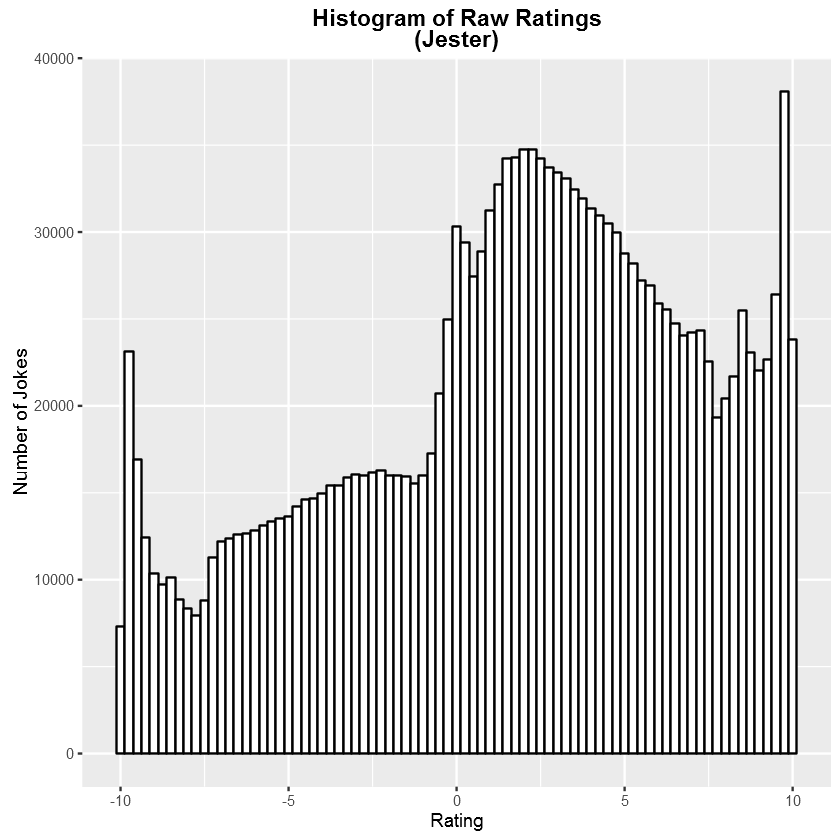

In [19]:
p1 <- ggplot(data.frame(x=getRatings(jester_rrm)), aes(x))
p1 <- p1 + geom_histogram(binwidth=.25,colour="black", fill="white")
p1 <- p1 + ggtitle("Histogram of Raw Ratings\n(Jester)")
p1 <- p1 + theme(plot.title = element_text(lineheight=.8, face="bold", vjust=2))
p1 <- p1 + xlab("Rating")  
p1 <- p1 + ylab("Number of Jokes") 
p1 # Rating distribution

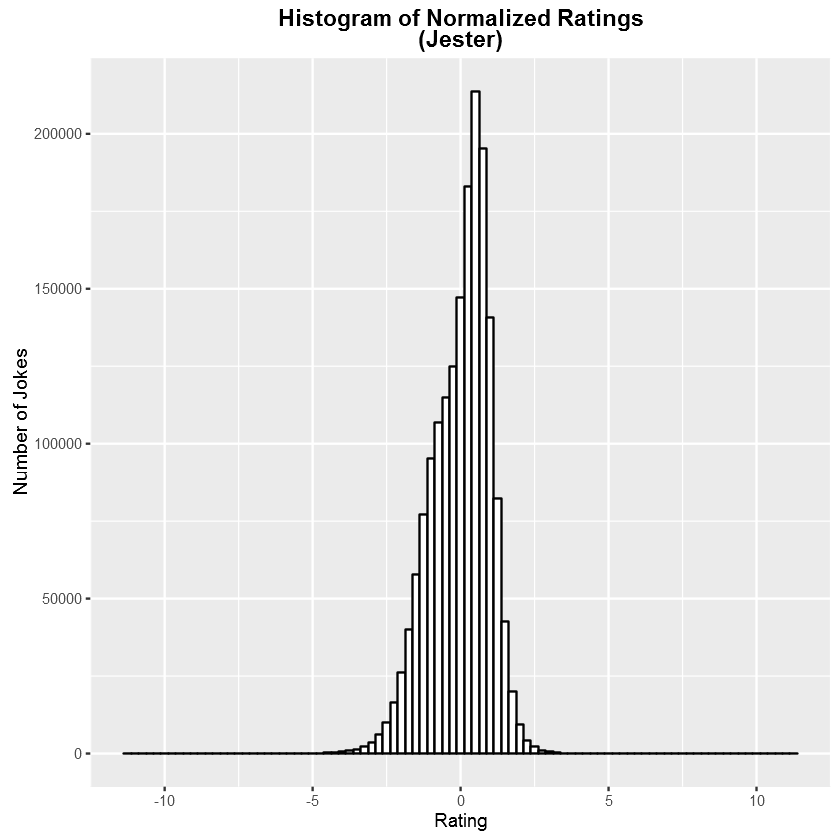

In [20]:
p2 <- ggplot(data.frame(x=getRatings(normalize(jester_rrm, method="Z-score"))), aes(x))
p2 <- p2 + geom_histogram(binwidth=.25,colour="black", fill="white")
p2 <- p2 + ggtitle("Histogram of Normalized Ratings\n(Jester)")
p2 <- p2 + theme(plot.title = element_text(lineheight=.8, face="bold", vjust=2))
p2 <- p2 + xlab("Rating")  
p2 <- p2 + ylab("Number of Jokes") 
p2

In [21]:
jester_items_rated_per_user <- rowCounts(jester_rrm) #for each row how many counts
jester_average_item_rating_per_item  <- colMeans(jester_rrm) # for each item the average rating

Warning message:
: Removed 10 rows containing non-finite values (stat_bin).

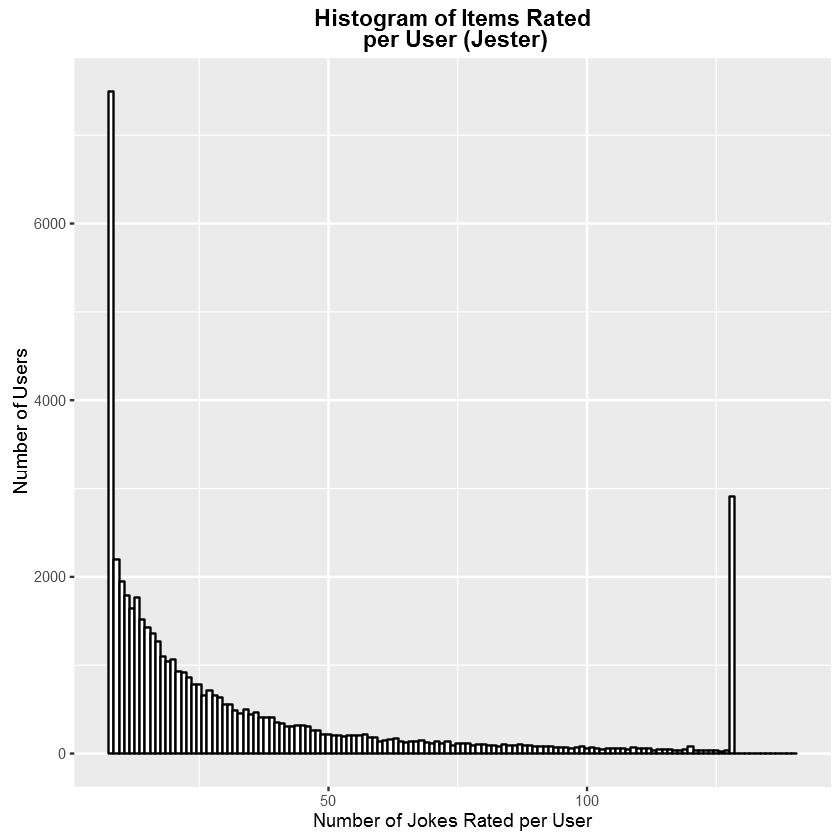

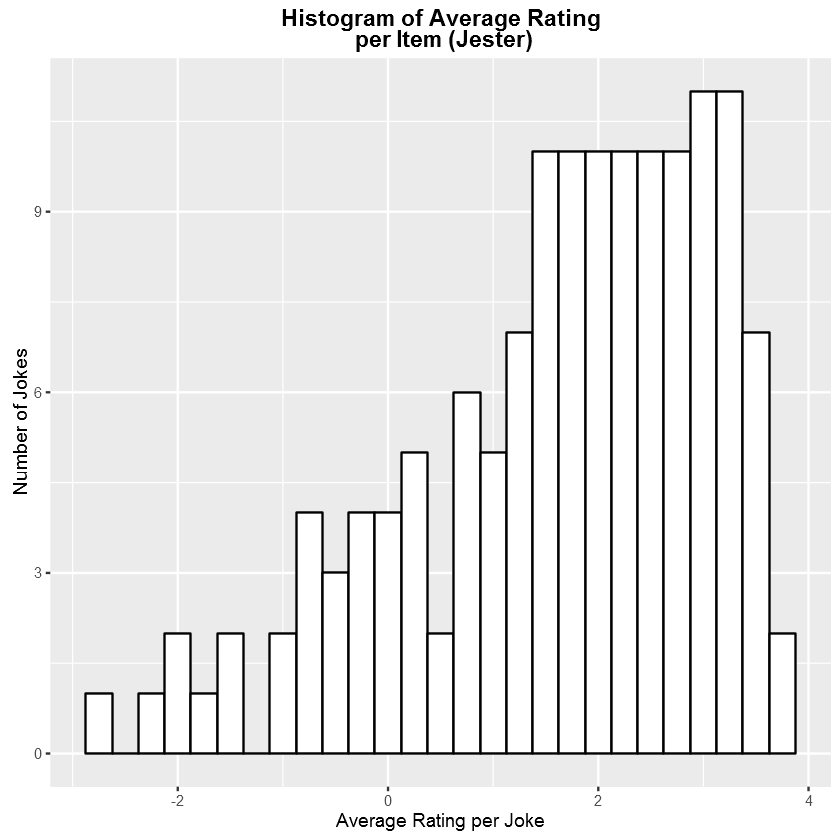

In [22]:
p1 <- ggplot(data.frame(x=rowCounts(jester_rrm)), aes(x))
p1 <- p1 + geom_histogram(binwidth=1,colour="black", fill="white")
p1 <- p1 + ggtitle("Histogram of Items Rated\n per User (Jester)")
p1 <- p1 + theme(plot.title = element_text(lineheight=.8, face="bold", vjust=2))
p1 <- p1 + xlab("Number of Jokes Rated per User")  
p1 <- p1 + ylab("Number of Users") 
p1

p2 <- ggplot(data.frame(x=colMeans(jester_rrm)), aes(x))
p2 <- p2 + geom_histogram(binwidth=.25,colour="black", fill="white")
p2 <- p2 + ggtitle("Histogram of Average Rating\n per Item (Jester)")
p2 <- p2 + theme(plot.title = element_text(lineheight=.8, face="bold", vjust=2))
p2 <- p2 + xlab("Average Rating per Joke")  
p2 <- p2 + ylab("Number of Jokes") 
p2

In [23]:
(jester_average_items_rated_per_user <- mean(rowCounts(jester_rrm)))
(jester_average_item_rating <- mean(colMeans(jester_rrm), na.rm=T)) #remove the NAs
(movies_average_items_rated_per_user <- mean(rowCounts(movies_rrm)))
(movies_average_item_rating <- mean(colMeans(movies_rrm)))

[1] 34.10493

[1] 1.633048

[1] 165.5975

[1] 3.238892

In [30]:
summary(colMeans(jester_rrm, na.rm=TRUE))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-2.7480  0.7668  1.9150  1.6330  2.7990  3.7140      10 

#### Evaluating binary top-N recommendations (User-based collaborative Filtering)

In [33]:
jester_bn <- binarize(jester_rrm, minRating=5)
jester_bn <- jester_bn[rowCounts(jester_bn)>10]
dim(jester_bn)
# Create a list of algorithms we want to use and the name parameter must be recognized by the package
algorithms <- list(
     "Random" = list(name="RANDOM", param=NULL), 
#The RANDOM algorithm is a baseline algorithm that makes recommendations randomly
     "Popular" = list(name="POPULAR", param=NULL),
#This proposes items in descending order of global popularity, so that for a top-1 recommendation, 
    it will recommend the item with the highest average rating in the data set.
     "UserBasedCF_COS" = list(name="UBCF", param=list(method="Cosine", nn=50)),
     "UserBasedCF_JAC" = list(name="UBCF", param=list(method="Jaccard", nn=50)) #how many nearest neighbors
)

[1] 13789   150

In [34]:
#Split the training and test sets, the number of ratings we will take as given from our test users and how many runs we want to execute
jester_split_scheme <- evaluationScheme(jester_bn, method = "split", train = 0.8, given = 10, k=1)
# Note that the given  parameter must be at least as large as the smallest number of items rated by a user in our data set
jester_split_eval <- evaluate(jester_split_scheme, algorithms, n = 1:20) #the range of values to use when making top-N recommendations

RANDOM run fold/sample [model time/prediction time]
	 1  [0.02sec/0.68sec] 
POPULAR run fold/sample [model time/prediction time]
	 1  [0.01sec/9.9sec] 
UBCF run fold/sample [model time/prediction time]
	 1  [0sec/24.95sec] 
UBCF run fold/sample [model time/prediction time]
	 1  [0sec/24.36sec] 


In [36]:
options(digits = 4)

In [37]:
getConfusionMatrix(jester_split_eval[[4]])

,TP,FP,FN,TN,precision,recall,TPR,FPR
1,5.261e-01,4.739e-01,1.852e+01,1.205e+02,5.261e-01,6.383e-02,6.383e-02,3.818e-03
2,1.019e+00,9.811e-01,1.803e+01,1.200e+02,5.094e-01,1.151e-01,1.151e-01,7.863e-03
3,1.48187,1.51813,17.56236,119.43764,0.49396,0.15967,0.15967,0.01213
4,1.92458,2.07542,17.11965,118.88035,0.48115,0.20189,0.20189,0.01657
5,2.3463,2.6537,16.6980,118.3020,0.4693,0.2373,0.2373,0.0212
6,2.74438,3.25562,16.29985,117.70015,0.45740,0.26943,0.26943,0.02606
7,3.13452,3.86548,15.90972,117.09028,0.44779,0.30133,0.30133,0.03094
8,3.50544,4.49456,15.53880,116.46120,0.43818,0.32853,0.32853,0.03599
9,3.86149,5.13851,15.18274,115.81726,0.42905,0.35363,0.35363,0.04111
10,4.20377,5.79623,14.84046,115.15954,0.42038,0.37997,0.37997,0.04641


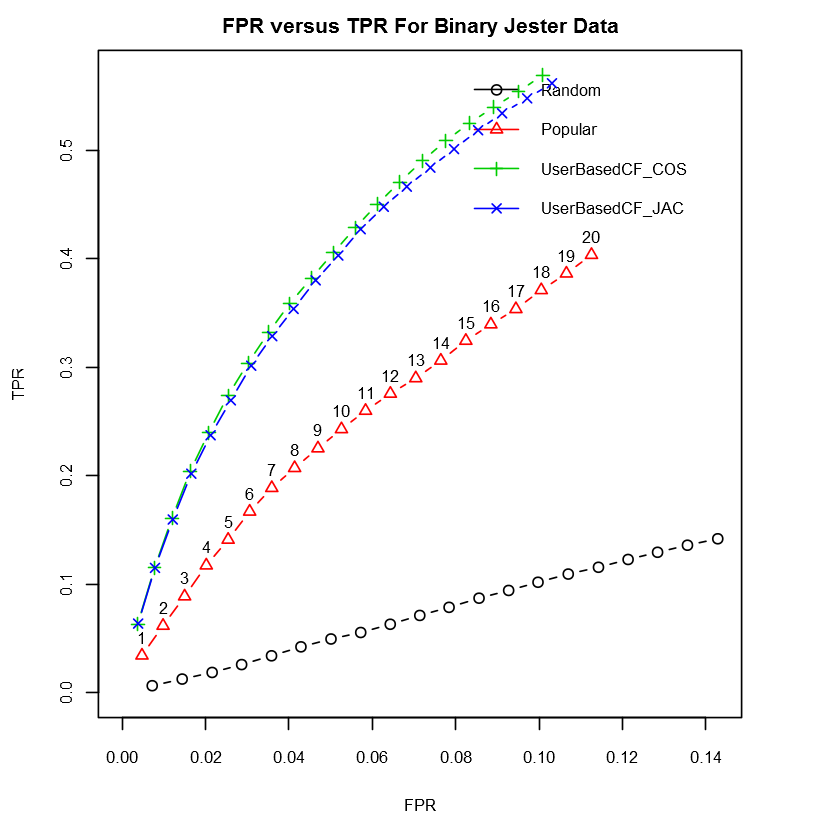

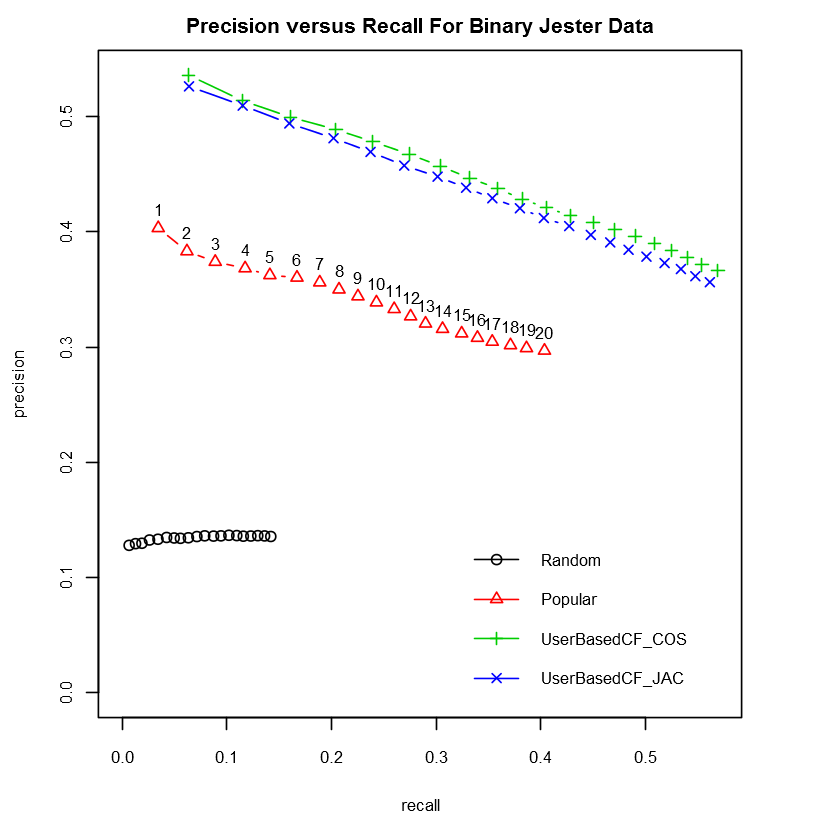

In [38]:
plot(jester_split_eval, annotate=2, legend="topright")
title(main="FPR versus TPR For Binary Jester Data")

plot(jester_split_eval, "prec/rec", annotate=2, legend="bottomright")
title(main="Precision versus Recall For Binary Jester Data")

Note that the trade off between  precision and recall surfaces in a top-N recommender system via the number of recommendations that the system makes. The way our evaluation scheme works is that we treat users in the test data as new users in the system that just contributed a certain number of ratings. We hold out as many ratings as the given  parameter allows. Then, we apply our model in order to see if the ratings we suggest will agree with the ratings that remain. We order our suggestions in descending order of confidence so that in a top-1 recommendation system, we will suggest the item we believe has the best chance of interesting the user. Increasing N  therefore is like casting a wider net. We will be less precise in our suggestions but are more likely to find something the user will like.

In [39]:
normalized_algorithms <- list(
     "Random" = list(name="RANDOM", param=list(normalize = "Z-score")),
     "Popular" = list(name="POPULAR", param=list(normalize = "Z-score")),
     "UserBasedCF" = list(name="UBCF", param=list(normalize = "Z-score", method="Cosine", nn=50)),
     "ItemBasedCF" = list(name="IBCF", param=list(normalize = "Z-score")),
     "SVD" = list(name="SVD", param=list(categories=30, normalize="Z-score", treat_na="median"))
 )
movies_cross_scheme <- evaluationScheme(movies_rrm, method = "cross-validation", k = 10, given = 10, goodRating = 4)
movies_cross_eval <- evaluate(movies_cross_scheme, normalized_algorithms, n=1:20)

RANDOM run fold/sample [model time/prediction time]
	 1  [0sec/1.35sec] 
	 2  [0.01sec/1.35sec] 
	 3  [0sec/1.33sec] 
	 4  [0.02sec/1.33sec] 
	 5  [0.02sec/1.34sec] 
	 6  [0sec/1.36sec] 
	 7  [0sec/1.37sec] 
	 8  [0sec/1.4sec] 
	 9  [0sec/1.29sec] 
	 10  [0sec/1.37sec] 
POPULAR run fold/sample [model time/prediction time]
	 1  [1sec/9.32sec] 
	 2  [0.96sec/8.82sec] 
	 3  [0.97sec/8.08sec] 
	 4  [0.97sec/8.03sec] 
	 5  [1sec/8sec] 
	 6  [0.98sec/8.16sec] 
	 7  [1.11sec/8.14sec] 
	 8  [1.02sec/8.48sec] 
	 9  [1.07sec/8.1sec] 
	 10  [1sec/8.25sec] 
UBCF run fold/sample [model time/prediction time]
	 1  [0.99sec/181.7sec] 
	 2  [0.98sec/182.1sec] 
	 3  [0.94sec/182.1sec] 
	 4  [1.05sec/182.9sec] 
	 5  [0.95sec/186.8sec] 
	 6  [1.15sec/187.6sec] 
	 7  [0.97sec/196.3sec] 
	 8  [0.94sec/187sec] 
	 9  [0.93sec/186.9sec] 
	 10  [0.95sec/190.8sec] 
IBCF run fold/sample [model time/prediction time]
	 1  [1169sec/1.03sec] 
	 2  [1234sec/0.79sec] 
	 3  [1323sec/0.87sec] 
	 4  [1374sec/0.84sec] 
	 5

Warning message:
: Unknown parameters: categories, treat_na

Available parameter (with default values):
k	 =  10
maxiter	 =  100
normalize	 =  center
minRating	 =  NA
verbose	 =  FALSE
[6.83sec/2.83sec] 
	 2  

Warning message:
: Unknown parameters: categories, treat_na

Available parameter (with default values):
k	 =  10
maxiter	 =  100
normalize	 =  center
minRating	 =  NA
verbose	 =  FALSE
[6.65sec/2.69sec] 
	 3  

Warning message:
: Unknown parameters: categories, treat_na

Available parameter (with default values):
k	 =  10
maxiter	 =  100
normalize	 =  center
minRating	 =  NA
verbose	 =  FALSE
[6.99sec/2.76sec] 
	 4  

Warning message:
: Unknown parameters: categories, treat_na

Available parameter (with default values):
k	 =  10
maxiter	 =  100
normalize	 =  center
minRating	 =  NA
verbose	 =  FALSE
[7.41sec/2.57sec] 
	 5  

Warning message:
: Unknown parameters: categories, treat_na

Available parameter (with default values):
k	 =  10
maxiter	 =  100
normalize	 =  center
minRating	 =  NA
verbose	 =  FALSE
[7.01sec/2.77sec] 
	 6  

Warning message:
: Unknown parameters: categories, treat_na

Available parameter (with default values):
k	 =  10
maxiter	 =  100
normalize	 =  center
minRating	 =  NA
verbose	 =  FALSE
[7.03sec/2.58sec] 
	 7  

Warning message:
: Unknown parameters: categories, treat_na

Available parameter (with default values):
k	 =  10
maxiter	 =  100
normalize	 =  center
minRating	 =  NA
verbose	 =  FALSE
[7.41sec/2.51sec] 
	 8  

Warning message:
: Unknown parameters: categories, treat_na

Available parameter (with default values):
k	 =  10
maxiter	 =  100
normalize	 =  center
minRating	 =  NA
verbose	 =  FALSE
[7.06sec/2.48sec] 
	 9  

Warning message:
: Unknown parameters: categories, treat_na

Available parameter (with default values):
k	 =  10
maxiter	 =  100
normalize	 =  center
minRating	 =  NA
verbose	 =  FALSE
[6.99sec/2.76sec] 
	 10  

Warning message:
: Unknown parameters: categories, treat_na

Available parameter (with default values):
k	 =  10
maxiter	 =  100
normalize	 =  center
minRating	 =  NA
verbose	 =  FALSE
[7.1sec/2.71sec] 
